In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####import

In [16]:
import numpy as np 
import pandas as pd
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [3]:
TRAIN_DATA_PATH = '/content/drive/MyDrive/kaggle/titanic/train.csv'
TEST_DATA_PATH = '/content/drive/MyDrive/kaggle/titanic/test.csv'

In [4]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data = pd.read_csv(TEST_DATA_PATH)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#####Choose Features

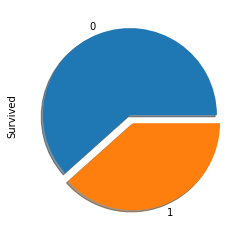

In [ ]:
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],shadow=True)

In [6]:
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Embarked']

train_data['Age'] = train_data['Age'].replace(np.NaN, train_data['Age'].dropna().mean())
test_data['Age']  = test_data['Age'].replace(np.NaN, test_data['Age'].dropna().mean())
test_data['Fare']  = test_data['Fare'].replace(np.NaN, test_data['Fare'].dropna().mean())

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].dropna().mode()[0])
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked']  = test_data['Embarked'].fillna(test_data['Embarked'].dropna().mode()[0])
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} )
test_data['Sex']  = test_data['Sex'].map( {'female': 1, 'male': 0} )


train_filtered = train_data[features + ['Survived']]
X = pd.get_dummies(train_filtered[features])
Y = train_filtered['Survived']

In [110]:
over_sampler = SMOTE()
X, Y = over_sampler.fit_resample(X, Y)

X=np.array(X)
Y=keras.utils.to_categorical(np.array(Y))

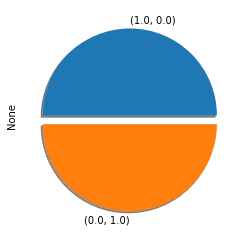

In [45]:
pd.DataFrame(Y).value_counts().plot.pie(explode=[0,0.1],shadow=True)

In [111]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape

(768, 7)

In [ ]:
train_data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Pclass    891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
test_data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    int64  
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      418 non-null    float64
 5   Pclass    418 non-null    int64  
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


#####Model

In [112]:
model = Sequential()

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [113]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

In [114]:
history=model.fit(X_train,Y_train, batch_size=10, validation_data=(X_val,Y_val),epochs= 50)

Epoch 1/50
77/77 [==============================] - 1s 4ms/step - loss: 5.8222 - accuracy: 0.5000 - val_loss: 4.7358 - val_accuracy: 0.5000
Epoch 2/50
77/77 [==============================] - 0s 3ms/step - loss: 4.2591 - accuracy: 0.5000 - val_loss: 3.5676 - val_accuracy: 0.5000
Epoch 3/50
77/77 [==============================] - 0s 4ms/step - loss: 3.1947 - accuracy: 0.5000 - val_loss: 2.5994 - val_accuracy: 0.4939
Epoch 4/50
77/77 [==============================] - 0s 3ms/step - loss: 2.2317 - accuracy: 0.4831 - val_loss: 1.6944 - val_accuracy: 0.4788
Epoch 5/50
77/77 [==============================] - 0s 3ms/step - loss: 1.4540 - accuracy: 0.5156 - val_loss: 1.1096 - val_accuracy: 0.6030
Epoch 6/50
77/77 [==============================] - 0s 3ms/step - loss: 1.0626 - accuracy: 0.6068 - val_loss: 0.8871 - val_accuracy: 0.6273
Epoch 7/50
77/77 [==============================] - 0s 3ms/step - loss: 0.9250 - accuracy: 0.6068 - val_loss: 0.8164 - val_accuracy: 0.6303
Epoch 8/50
77/77 [==

#####TUTORIAL_MODEL

In [117]:
from sklearn.ensemble import RandomForestClassifier
tutorial_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# for testing acc
tutorial_model.fit(X_train, Y_train)
'random forest acc:', round(tutorial_model.score(X_val, Y_val) * 100, 2)

('random forest acc:', 83.33)

#####Output

In [118]:
X_test = pd.get_dummies(test_data[features])
# NN predictions
output_predictions = (model.predict(X_test) > 0.5).astype("int32").T[0].T[1].astype(int)
# RandomForestClassifier predictions
tutorial_model.fit(X, Y)
tutorial_predictions = tutorial_model.predict(X_test)
output_predictions = tutorial_model.predict(X_test).T[1].astype(int)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': output_predictions})

In [119]:
OUTPUTH_FILE_PATH = '/content/drive/MyDrive/kaggle/titanic/my_submission.csv'
output.to_csv(OUTPUTH_FILE_PATH, index=False)